### Importing all the necessary libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Creating dataframe

In [2]:
# inserting the dataset using read_csv and creating dataframe "df"

data = pd.read_csv("Titanic-Dataset.csv")

In [3]:
# creating a copy of dataset using copy() function

df = data.copy()

In [4]:
# to get the top 5 rows of dataset head() is used.

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# to check the information of dataset info() is used.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* The dataset has 12 columns which means it has 11 input columns and 1 output column.
* As we can see the output column is "Survived" which have only two classes 0 and 1 , hence the dataset is of classification type.
* The dataset has 891 rows and 12 columns.
* It has 5 integer, 2 float and 4 object type columns and some of the columns have null values.
* Few columns have inappropriate data types

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the given dataset summary, we can derive several important points and conclusions:


* As describe() by default shows description of only numeric column, hence 7 columns have been shown.
* There's considerable variation in passenger ages, ranging from infants to elderly individuals.
* The majority of passengers were traveling without siblings, spouses, parents, or children.
* The fare distribution indicates a wide range of ticket prices, with some passengers paying significantly higher fares.
*  Further analysis could be conducted to explore relationships between these variables and survival rates, such as the impact of passenger class, age, and fare on survival likelihood.



In [7]:
# checking description of only object column

df.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [8]:
# checking the null values in the columns.

df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Few conclusions

* 1. Missing values in Age, Cabin and Embarked columns
* 2. More than 70 percent values are missing in cabin columns, will have to drop



In [9]:
# Dropping cabin column

df.drop(columns=["Cabin"],inplace=True)

In [10]:
# Imputing missing values for age
# Strategy - mean

df["Age"].fillna(df["Age"].mean(), inplace=True)

In [11]:
# Imputing missing values for embarked

# finding the most appeared value in embarked column

df["Embarked"].value_counts()



Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [12]:
# filled missing value with "s"

df["Embarked"].fillna("S", inplace=True)


In [13]:
df.duplicated().sum()

0

In [14]:
# Want to check one more thing...

# Should I change the SibSp and Parch to categories

df["SibSp"].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [15]:
df["Parch"].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

## Changing data type for the following cols

- Survived(category)
- PClass(category)
- Sex(category)
- Age(int)
- Embarked(category)

In [16]:
df['Survived']=df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Sex']=df['Sex'].astype('category')
df['Age']=df['Age'].astype('int')
df['Embarked']=df['Embarked'].astype('category')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int32   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int32(1), int64(3), object(2)
memory usage: 49.4+ KB


*  All columns have 891 non-null entries, it seems there are no missing values.

In [18]:
# Five point summary
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


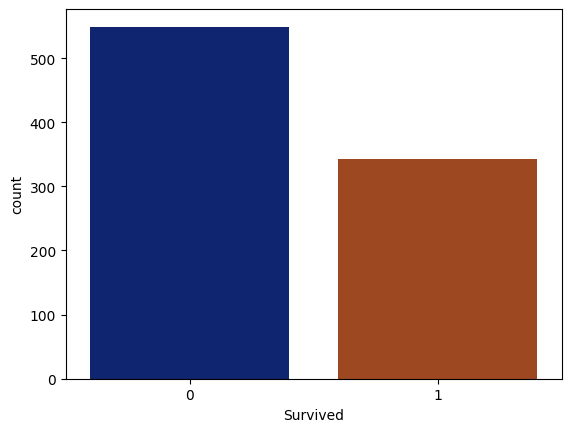

Out of 891, 62% people died in the accident


In [19]:
# Univariate Analysis - Survived column
sns.countplot(x='Survived', data=df, palette='dark', orient='v')
plt.show()

death_percent = round((df['Survived'].value_counts(normalize=True).values[0] * 100))

print("Out of 891, {}% people died in the accident".format(death_percent))


Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64


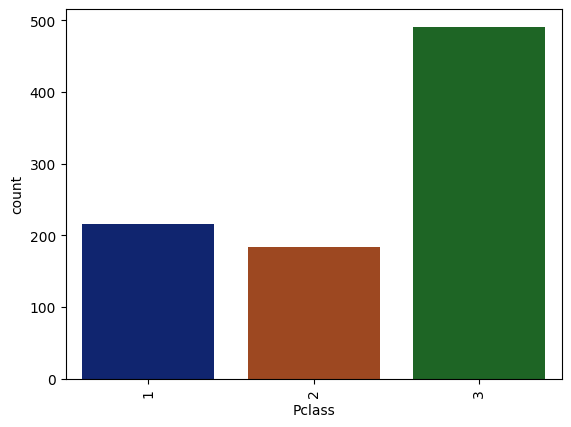

In [20]:
# Pclass column

print((df['Pclass'].value_counts() / 891) * 100)

# Changing the style and orientation
sns.countplot(x='Pclass', data=df, palette='dark')
plt.xticks(rotation=90)  # Rotating x-axis labels for vertical display
plt.show()


* Conclusion : Pclass was the most crowded class

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64


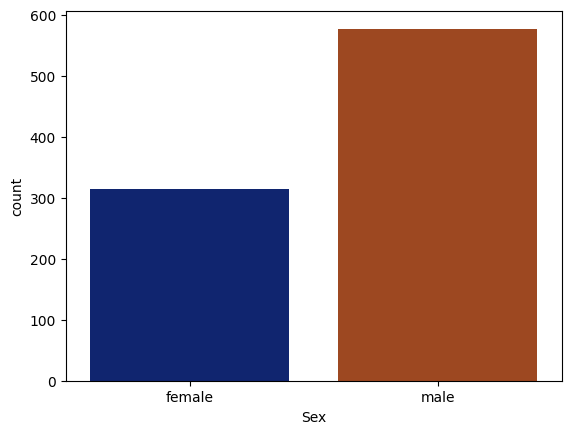

In [21]:
# Sex column
print((df['Sex'].value_counts() / 891) * 100)

# Changing the style and orientation
sns.countplot(x='Sex', data=df, palette='dark', orient='v')
plt.show()


SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


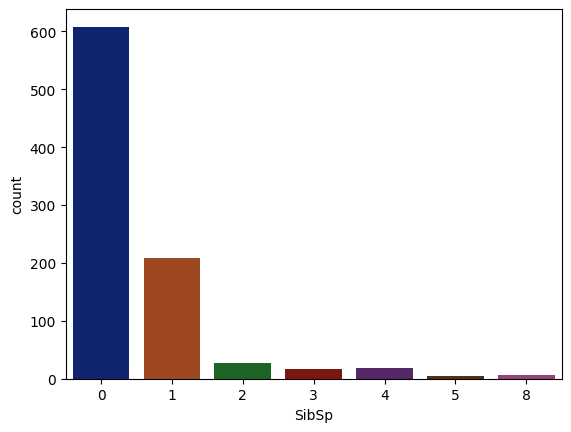

In [22]:
# SibSp column
print(df['SibSp'].value_counts())

# Changing the style and orientation
sns.countplot(x='SibSp', data=df, palette='dark', orient='v')
plt.show()


Parch
0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: count, dtype: float64


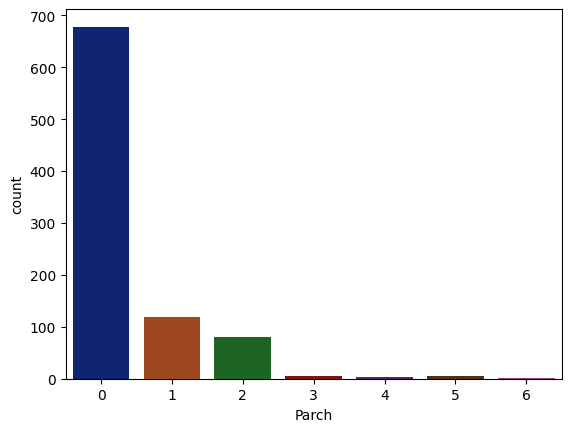

In [23]:
# Parch column
print((df['Parch'].value_counts() / 891) * 100)

# Changing the style and orientation
sns.countplot(x='Parch', data=df, palette='dark', orient='v')
plt.show()


* we can derive the following main points:
 **Distribution of Parent/Children Count (Parch)**:
   - The code calculates the percentage distribution of passengers based on the count of parents/children ('Parch') they had aboard the Titanic.
   - The majority of passengers (approximately 76.09%) had no parents/children ('Parch = 0`).
   - About 13.24% of passengers had one parent/child ('Parch = 1'), while 8.98% had two parents/children ('Parch = 2`).
   - A very small percentage of passengers had higher counts of parents/children, with 'Parch` values of 3, 4, 5, and 6 being less than 1% each.



Embarked
S    72.502806
C    18.855219
Q     8.641975
Name: count, dtype: float64


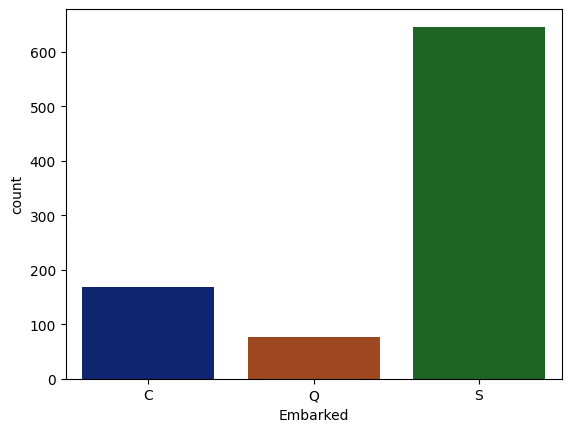

In [24]:
# Embarked column
print((df['Embarked'].value_counts() / 891) * 100)

# Changing the style and orientation
sns.countplot(x='Embarked', data=df, palette='dark', orient='v')
plt.show()


**Distribution of Embarkation Ports**:
- The code calculates the percentage distribution of passengers embarked from each port ('S', 'C', 'Q').
- Approximately 72.50% of the passengers embarked from Southampton ('S'), making it the most common embarkation port.
- About 18.86% of the passengers embarked from Cherbourg ('C'), followed by 8.64% from Queenstown ('Q').

These points provide insights into the distribution of passengers across the different embarkation ports, with Southampton being the most prevalent port of embarkation.

0.45956263424701577
0.9865867453652877


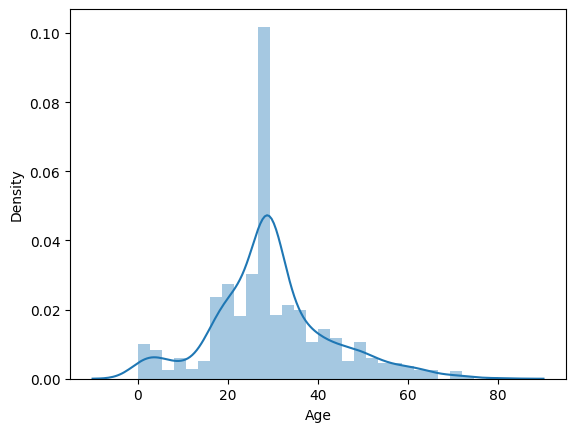

In [25]:
# Age column
# Plotting the distribution

sns.distplot(df['Age'])

# Checking skewness and kurtosis

print(df['Age'].skew())
print(df['Age'].kurt())

 **Skewness and Kurtosis**:
   - Skewness measures the asymmetry of the distribution. A positive skewness indicates that the distribution is skewed to the right (longer right tail), while a negative skewness indicates a left-skewed distribution.
   - Kurtosis measures the tail heaviness of the distribution. A higher kurtosis value indicates heavier tails compared to a normal distribution (leptokurtic), while a lower value indicates lighter tails (platykurtic).
   - The calculated skewness for the age distribution is approximately 0.4596, indicating a slight right skewness.
   - The calculated kurtosis for the age distribution is approximately 0.9866, suggesting that the distribution has slightly heavier tails compared to a normal distribution.



<Axes: >

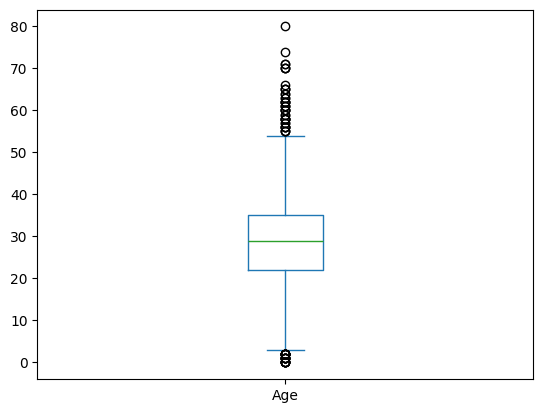

In [26]:
df["Age"].plot.box()

In [27]:
# Just out of curiosity

print("People with age in between 60 and 70 are",df[(df['Age']>60) & (df['Age']<70)].shape[0])
print("People with age greater than 70 and 75 are",df[(df['Age']>=70) & (df['Age']<=75)].shape[0])
print("People with age greater than 75 are",df[df['Age']>75].shape[0])

print('-'*50)

print("People with age between 0 and 1",df[df['Age']<1].shape[0])

People with age in between 60 and 70 are 15
People with age greater than 70 and 75 are 6
People with age greater than 75 are 1
--------------------------------------------------
People with age between 0 and 1 7


* Conclusion

- For all practical purposes age can be cosidered as normal distribution
- Deeper analysis is required for outlier detection

4.787316519674893
33.39814088089868


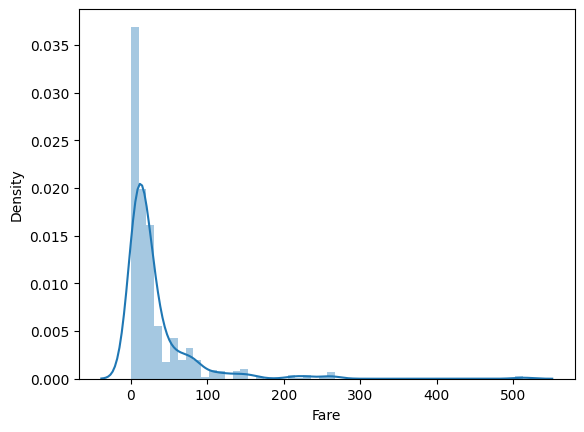

In [28]:
# Fare column

sns.distplot(df['Fare'])

# Checking skewness and kurtosis
print(df['Fare'].skew())
print(df['Fare'].kurt())


**Skewness and Kurtosis**:
   - The calculated skewness for the fare distribution is approximately 4.7873, indicating a significant right skewness.
   - The calculated kurtosis for the fare distribution is approximately 33.3981, suggesting that the distribution has extremely heavy tails compared to a normal distribution.

These points provide insights into the distribution of fares paid by the passengers aboard the Titanic, along with measures of skewness and kurtosis to describe the shape and characteristics of the distribution. Understanding the distribution of fares is essential for various analyses, such as exploring ticket pricing trends or assessing socioeconomic factors among the passengers.

<Axes: >

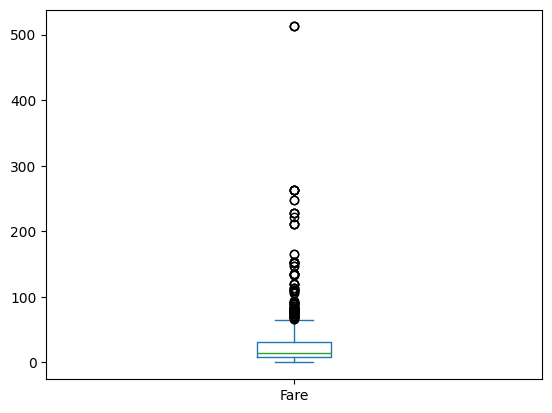

In [29]:
df["Fare"].plot.box()

In [30]:
print("People with fare in between $200 and $300",df[(df['Fare']>200) & (df['Fare']<300)].shape[0])
print("People with fare in greater than $300",df[df['Fare']>300].shape[0])

People with fare in between $200 and $300 17
People with fare in greater than $300 3


# Conclusion

- Highly skewed data, a lot of people had cheaper tickets
- Outliers are there in the data

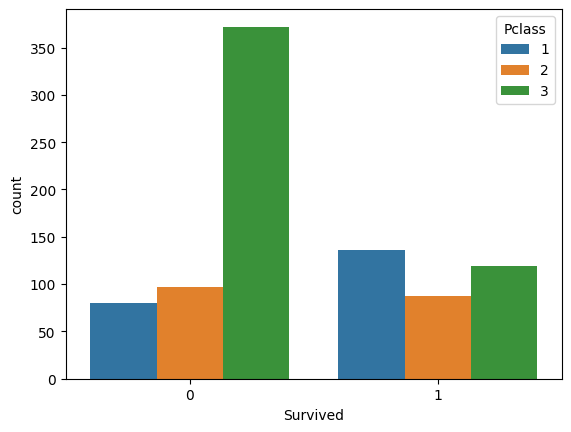

Survived     0     1
Pclass              
1         37.0  63.0
2         52.7  47.3
3         75.8  24.2


In [31]:
# Survival with Pclass
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.show()

# Creating a cross-tabulation
cross_tab = pd.crosstab(df['Pclass'], df['Survived'])
percentage_survived = cross_tab.apply(lambda x: round((x/x.sum())*100, 1), axis=1)
print(percentage_survived)


 **Cross-Tabulation Results**:
   - For passengers in **1st class (Pclass=1)**:
     - 63.0% survived, while 37.0% did not.
   - For passengers in **2nd class (Pclass=2)**:
     - 47.3% survived, while 52.7% did not.
   - For passengers in **3rd class (Pclass=3)**:
     - 24.2% survived, while 75.8% did not.

These points highlight the significant disparity in survival rates among passengers of different classes. Passengers in higher classes (1st class) had notably higher survival rates compared to those in lower classes (3rd class), indicating a potential correlation between socio-economic status and survival likelihood during the Titanic disaster.

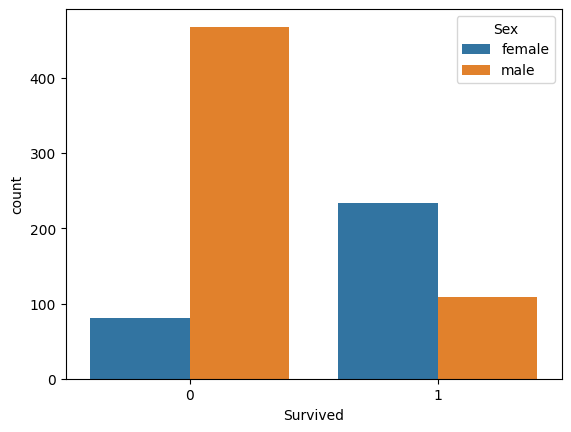

Survived     0     1
Sex                 
female    25.8  74.2
male      81.1  18.9


In [32]:
# Survival with Sex
sns.countplot(x='Survived', hue='Sex', data=df)
plt.show()

# Creating a cross-tabulation
cross_tab = pd.crosstab(df['Sex'], df['Survived'])
percentage_survived = cross_tab.apply(lambda x: round((x/x.sum())*100, 1), axis=1)
print(percentage_survived)



- The code creates a cross-tabulation of gender ('Sex') against survival status ('Survived').
- Each cell in the cross-tabulation represents the count of passengers belonging to a specific gender and their survival outcome.
- The percentages of survival within each gender category are calculated and displayed.

**Cross-Tabulation Results**:
 - For *female* passengers:
 - 74.2% survived, while 25.8% did not.
 - For *male* passengers:
 - 18.9% survived, while 81.1% did not.

These points underscore the stark difference in survival rates between male and female passengers. Females had a significantly higher likelihood of survival compared to males during the Titanic disaster. This observation suggests a prioritization of women and potentially children in the evacuation process, reflecting the "women and children first" protocol followed during maritime emergencies.

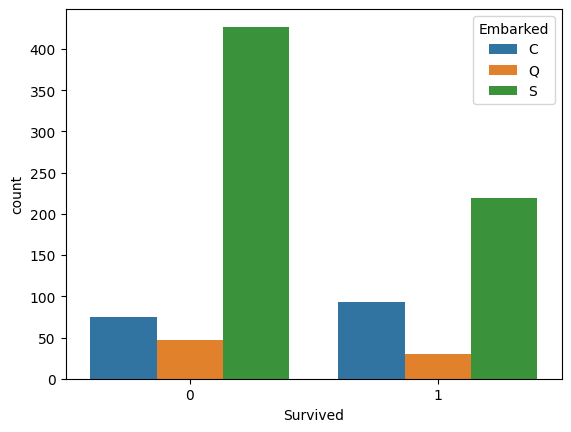

Survived     0     1
Embarked            
C         44.6  55.4
Q         61.0  39.0
S         66.1  33.9


In [33]:
# Survival with Embarked
sns.countplot(x='Survived', hue='Embarked', data=df)
plt.show()

# Creating a cross-tabulation
cross_tab = pd.crosstab(df['Embarked'], df['Survived'])
percentage_survived = cross_tab.apply(lambda x: round((x/x.sum())*100, 1), axis=1)
print(percentage_survived)



**Cross-Tabulation**:
   - The code creates a cross-tabulation of the port of embarkation ('Embarked') against survival status ('Survived').
   - Each cell in the cross-tabulation represents the count of passengers embarked from a specific port and their survival outcome.
   - The percentages of survival within each port of embarkation category are calculated and displayed.

**Cross-Tabulation Results**:
   - For passengers embarked from **Cherbourg (C)**:
     - 55.4% survived, while 44.6% did not.
   - For passengers embarked from **Queenstown (Q)**:
     - 39.0% survived, while 61.0% did not.
   - For passengers embarked from **Southampton (S)**:
     - 33.9% survived, while 66.1% did not.

These points reveal variations in survival rates among passengers based on the port from which they embarked. While there seems to be a higher survival rate for passengers embarked from Cherbourg compared to Queenstown and Southampton, further analysis may be needed to understand the underlying factors contributing to these differences, such as passenger demographics or cabin locations.

<Axes: xlabel='Age', ylabel='Density'>

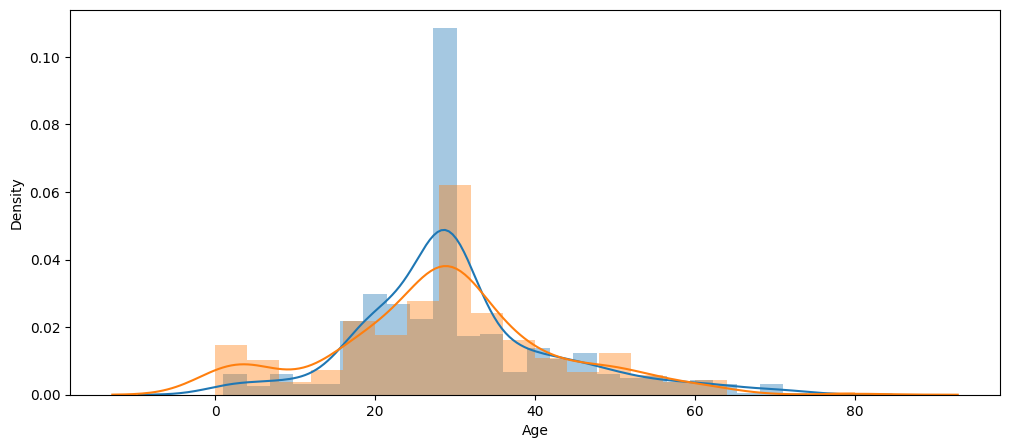

In [34]:
# Survived with Age

plt.figure(figsize=(12,5))
sns.distplot(df[df['Survived']==0]['Age'])
sns.distplot(df[df['Survived']==1]['Age'])

<Axes: xlabel='Fare', ylabel='Density'>

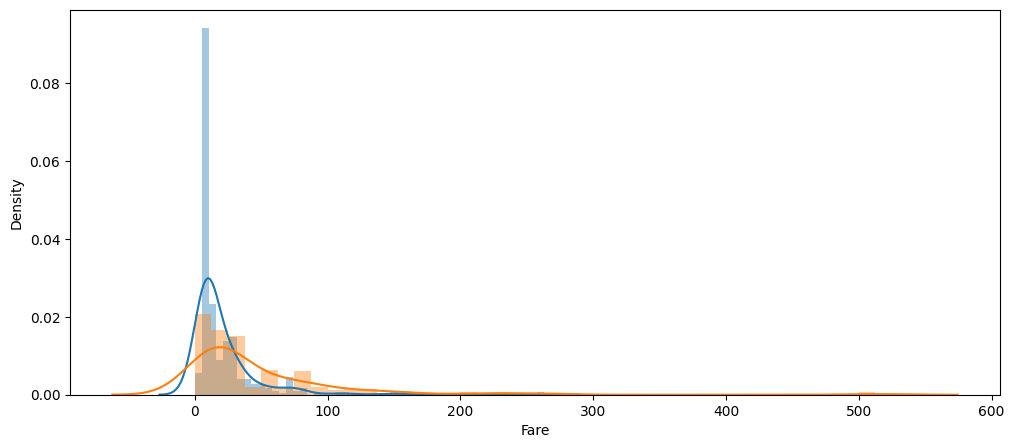

In [35]:
# Survived with Fare

plt.figure(figsize=(12,5))
sns.distplot(df[df['Survived']==0]['Fare'])
sns.distplot(df[df['Survived']==1]['Fare'])

In [36]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


In [37]:
df.shape

(891, 11)

In [38]:
## drop unnecessary columns
df = df.drop(columns=['Name', 'Ticket'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22,1,0,7.2500,S
1,2,1,1,female,38,1,0,71.2833,C
2,3,1,3,female,26,0,0,7.9250,S
3,4,1,1,female,35,1,0,53.1000,S
4,5,0,3,male,35,0,0,8.0500,S


## Label Encoding

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
le = LabelEncoder()

In [41]:
cols = ['Sex', 'Embarked']

for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22,1,0,7.2500,2
1,2,1,1,0,38,1,0,71.2833,0
2,3,1,3,0,26,0,0,7.9250,2
3,4,1,1,0,35,1,0,53.1000,2
4,5,0,3,1,35,0,0,8.0500,2


<Axes: >

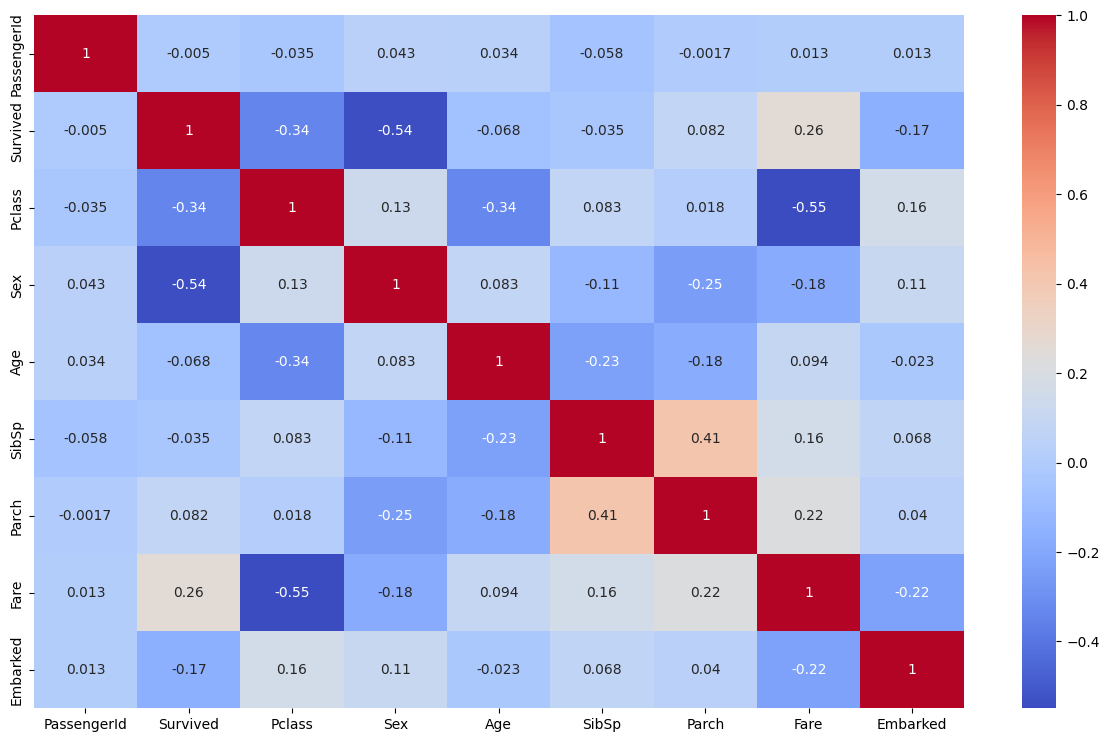

In [42]:
corr = df.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [43]:
# spliting the dataFrame

X = df.drop(columns=['Survived'], axis=1)
y = df['Survived']      # output

In [44]:
# Importing train test split

from sklearn.model_selection import train_test_split

In [45]:
## Splitting data into train and test 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [46]:
## Checking shape of train input data
X_train.shape

(668, 8)

In [47]:
## Checking shape of train output data
y_train.shape

(668,)

### Logistic Regression

In [48]:
## Importing LogisticRegression

from sklearn.linear_model import LogisticRegression


In [49]:
## Creating model for LogisticRegression


model = LogisticRegression()


In [50]:
## Fitting values in model

model.fit(X_train, y_train)

LogisticRegression()

In [51]:
## Checking model score/ training accuracy

model.score(X_train, y_train)

0.7934131736526946

In [52]:
## Importing accuracy_score,classification_report,confusion_matrix

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [53]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [54]:
## Checking testing accuracy

accuracy_score(y_test,y_pred)


0.7713004484304933

In [55]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       137
           1       0.70      0.72      0.71        86

    accuracy                           0.77       223
   macro avg       0.76      0.76      0.76       223
weighted avg       0.77      0.77      0.77       223



In [56]:
cnf_pred=confusion_matrix(y_pred, y_test)
cnf_pred

array([[110,  27],
       [ 24,  62]], dtype=int64)

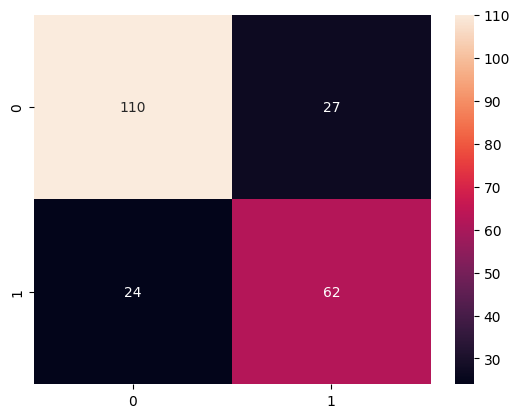

In [57]:
sns.heatmap(cnf_pred, annot=True, fmt="d")
plt.show()

In [58]:
## Importing DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [59]:
## Creating a model for DecisionTreeClassifier to inherit properties of it.
model1 = DecisionTreeClassifier()

In [60]:
## Fitting training input and output data in the model.
model1.fit(X_train, y_train)

DecisionTreeClassifier()

In [61]:
## Checking model score by giving X_train and y_train
model1.score(X_train,y_train)

1.0

In [62]:
## Predicting values
y_pred1= model1.predict(X_test)

In [63]:
## Checking accuracy score by giving 
accuracy_score(y_pred1, y_test)

0.7713004484304933

In [64]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       137
           1       0.70      0.72      0.71        86

    accuracy                           0.77       223
   macro avg       0.76      0.76      0.76       223
weighted avg       0.77      0.77      0.77       223



In [65]:
cnf_pred1=confusion_matrix(y_pred1, y_test)
cnf_pred1

array([[109,  26],
       [ 25,  63]], dtype=int64)

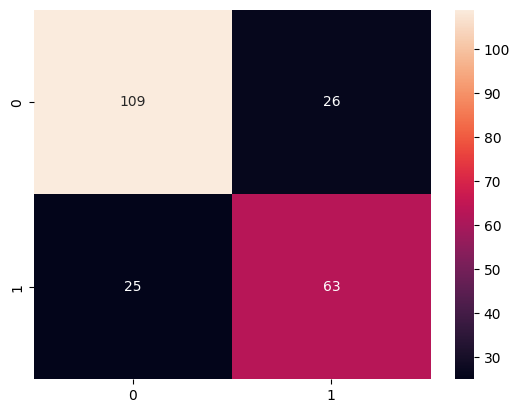

In [66]:
sns.heatmap(cnf_pred1, annot=True, fmt="d")
plt.show()

In [67]:
from sklearn.ensemble import AdaBoostClassifier

In [68]:
## Creating a model for AdaBoostClassifier and giving estimator as model of decision tree classifier
abc = AdaBoostClassifier(estimator=model1, n_estimators=500)

In [69]:
## Fitting data into the model by giving X_train and y_train
abc.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=500)

In [70]:
## Checking model score
model1.score(X_train, y_train)

1.0

In [71]:
## Predicting values
y_dtc = model.predict(X_test)

In [72]:
## Checking accuracy score
accuracy_score(y_dtc, y_test)

0.7713004484304933

In [73]:
cnf_dtc=confusion_matrix(y_dtc, y_test)
cnf_dtc

array([[110,  27],
       [ 24,  62]], dtype=int64)

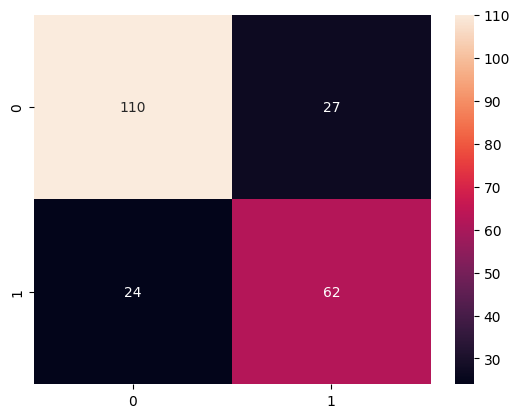

In [74]:
sns.heatmap(cnf_dtc, annot=True, fmt="d")
plt.show()

##  We get Logistic Regression best training and testing score 

# so model saving

In [75]:
# importing joblib
import joblib

In [77]:
joblib.dump(model, "Titanic_Survival_prediction_joblib") 

['Titanic_Survival_prediction_joblib']

# for model predict loading file

In [80]:
model = joblib.load("Titanic_Survival_prediction_joblib")

In [81]:
model.predict(X_test)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0], dtype=int64)